In [2]:
setwd("C:/Users/DJ COMPUTERS/OneDrive/Desktop/R prog")
### MODEL FOR CLASSIFYING IRIS FLOWER ###
### ADITYA KUMAR ROY ###

In [10]:
## LOADING PACKAGES 
library(ggplot2)
library(GGally)
library(psych)
library(car)
library(caret)
library(nnet)
library(pscl)
library(randomForest)
library(e1071)
library(grid)

In [5]:
## DATA PREPROCESSING 
Iris <- read.csv("Iris.csv")
head(Iris)
dim(Iris)
sum(is.na(Iris))    # no NA obv.
summary(Iris)       # no outliers 
str(Iris)           # well structured
print(levels(as.factor(Iris$Species)))        # 3 classifications
table(Iris$Species)    # each having 50 obv.
Iris_Data <- subset(Iris[2:6])


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa
5,5,5.0,3.6,1.4,0.2,Iris-setosa
6,6,5.4,3.9,1.7,0.4,Iris-setosa


[1] 150   6

[1] 0

       Id         SepalLengthCm    SepalWidthCm   PetalLengthCm  
 Min.   :  1.00   Min.   :4.300   Min.   :2.000   Min.   :1.000  
 1st Qu.: 38.25   1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600  
 Median : 75.50   Median :5.800   Median :3.000   Median :4.350  
 Mean   : 75.50   Mean   :5.843   Mean   :3.054   Mean   :3.759  
 3rd Qu.:112.75   3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100  
 Max.   :150.00   Max.   :7.900   Max.   :4.400   Max.   :6.900  
  PetalWidthCm     Species         
 Min.   :0.100   Length:150        
 1st Qu.:0.300   Class :character  
 Median :1.300   Mode  :character  
 Mean   :1.199                     
 3rd Qu.:1.800                     
 Max.   :2.500                     

'data.frame':	150 obs. of  6 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ SepalLengthCm: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ SepalWidthCm : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ PetalLengthCm: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ PetalWidthCm : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species      : chr  "Iris-setosa" "Iris-setosa" "Iris-setosa" "Iris-setosa" ...
[1] "Iris-setosa"     "Iris-versicolor" "Iris-virginica" 



    Iris-setosa Iris-versicolor  Iris-virginica 
             50              50              50 

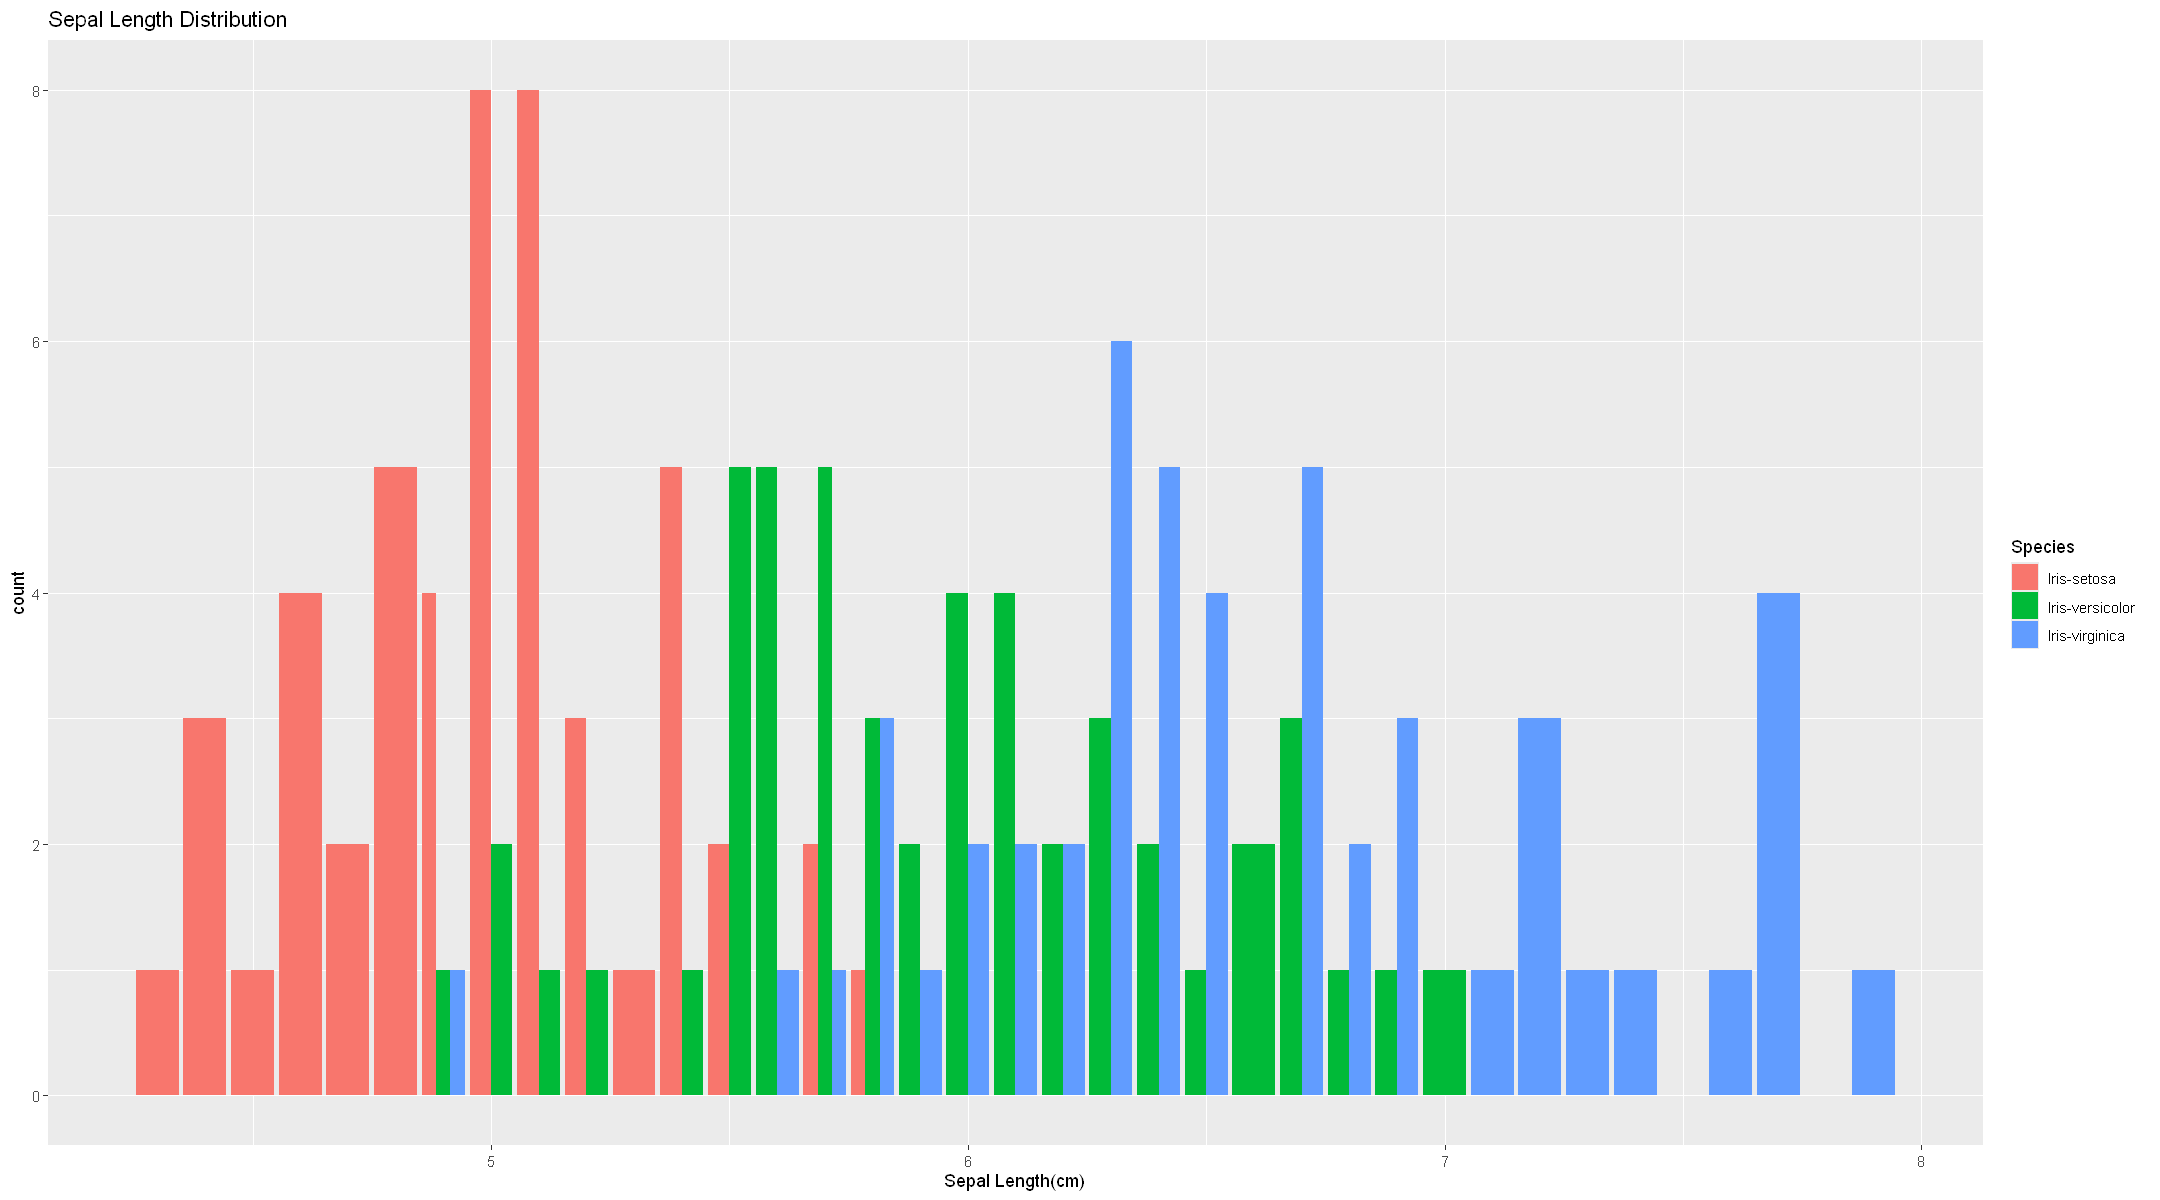

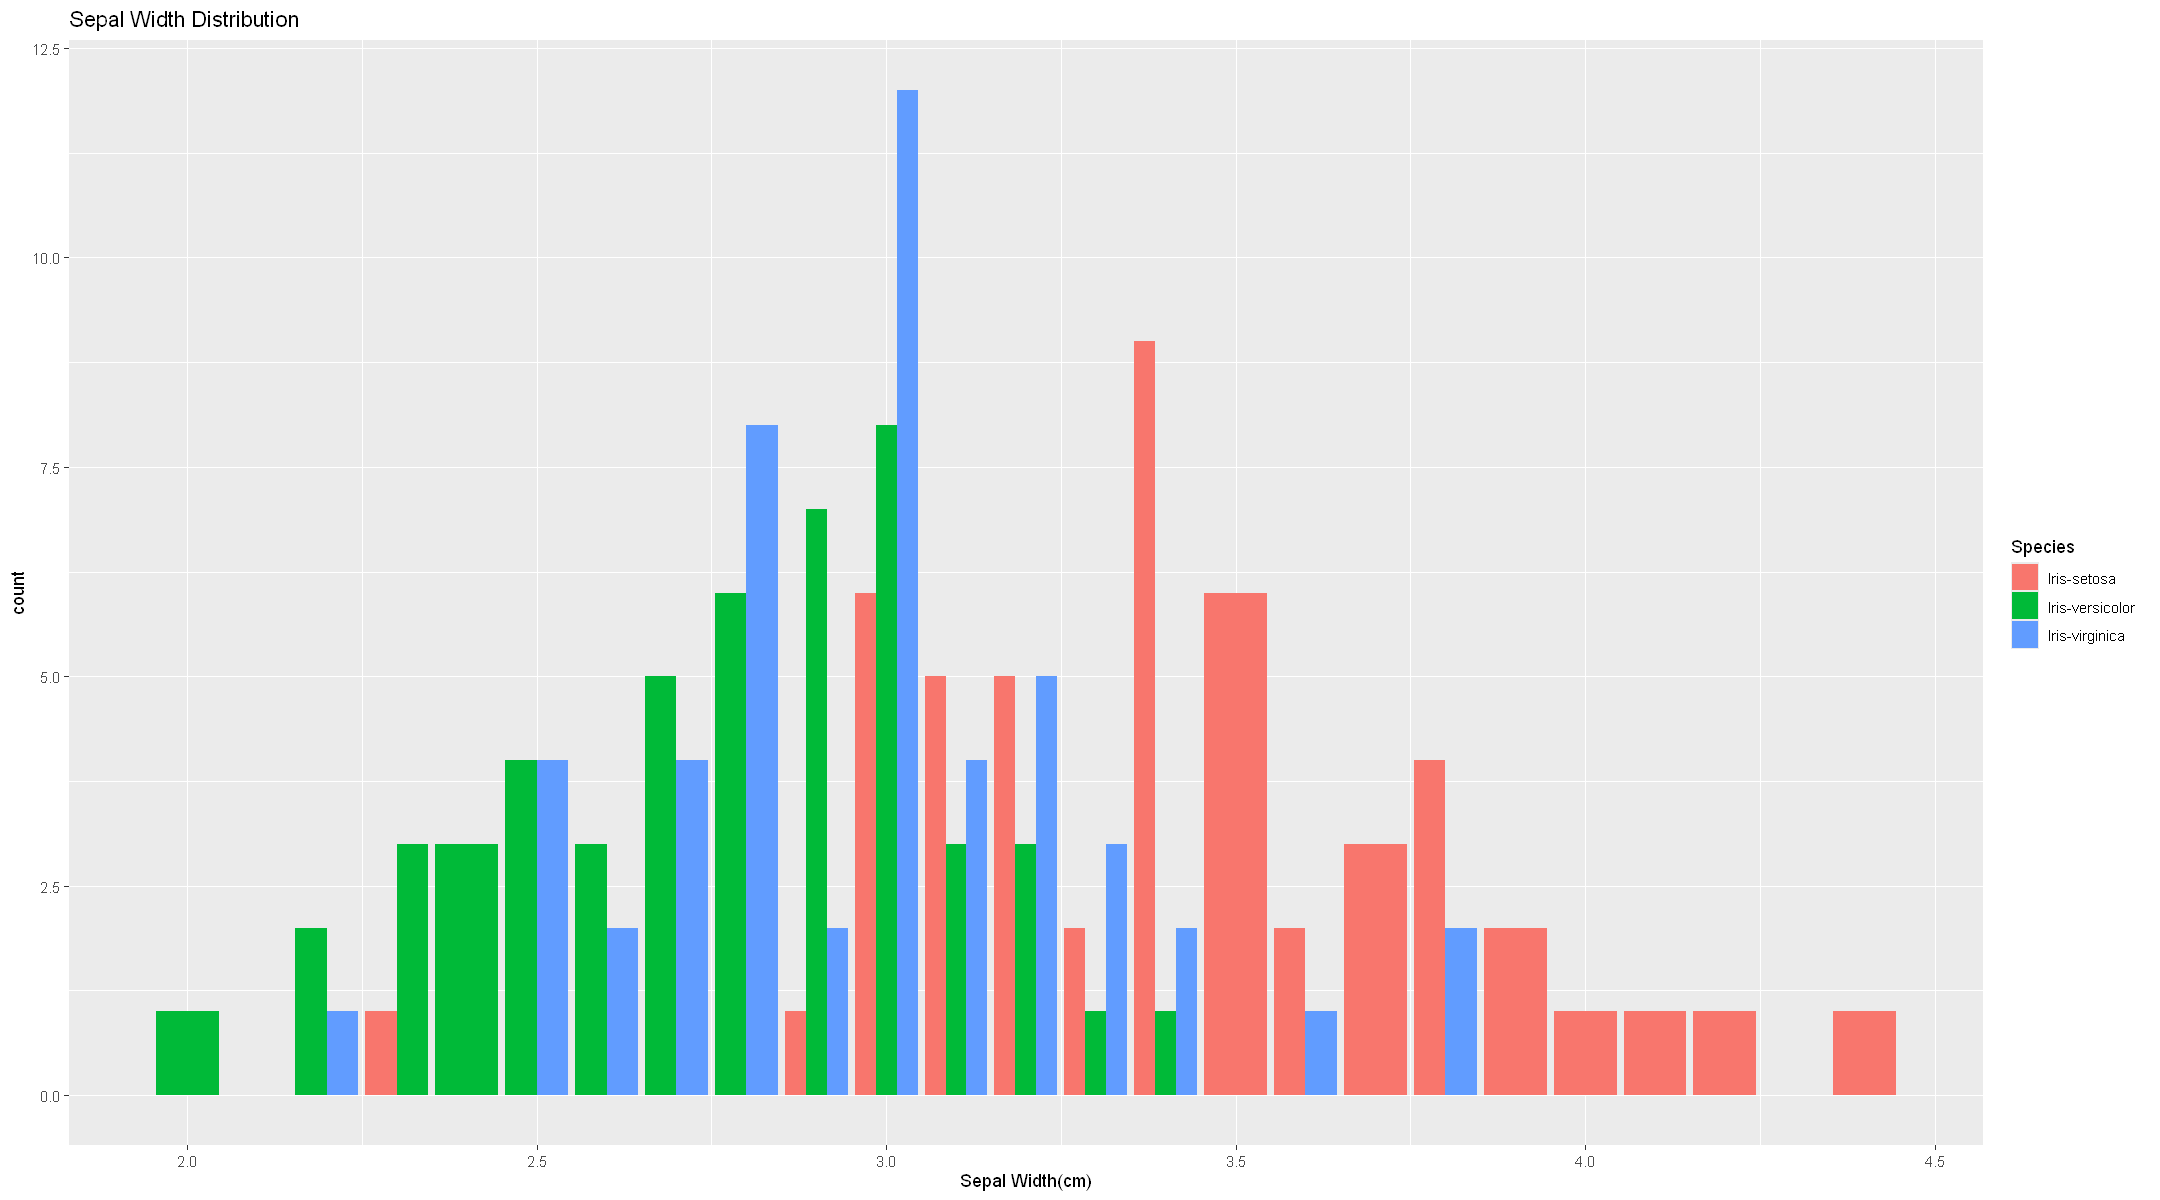

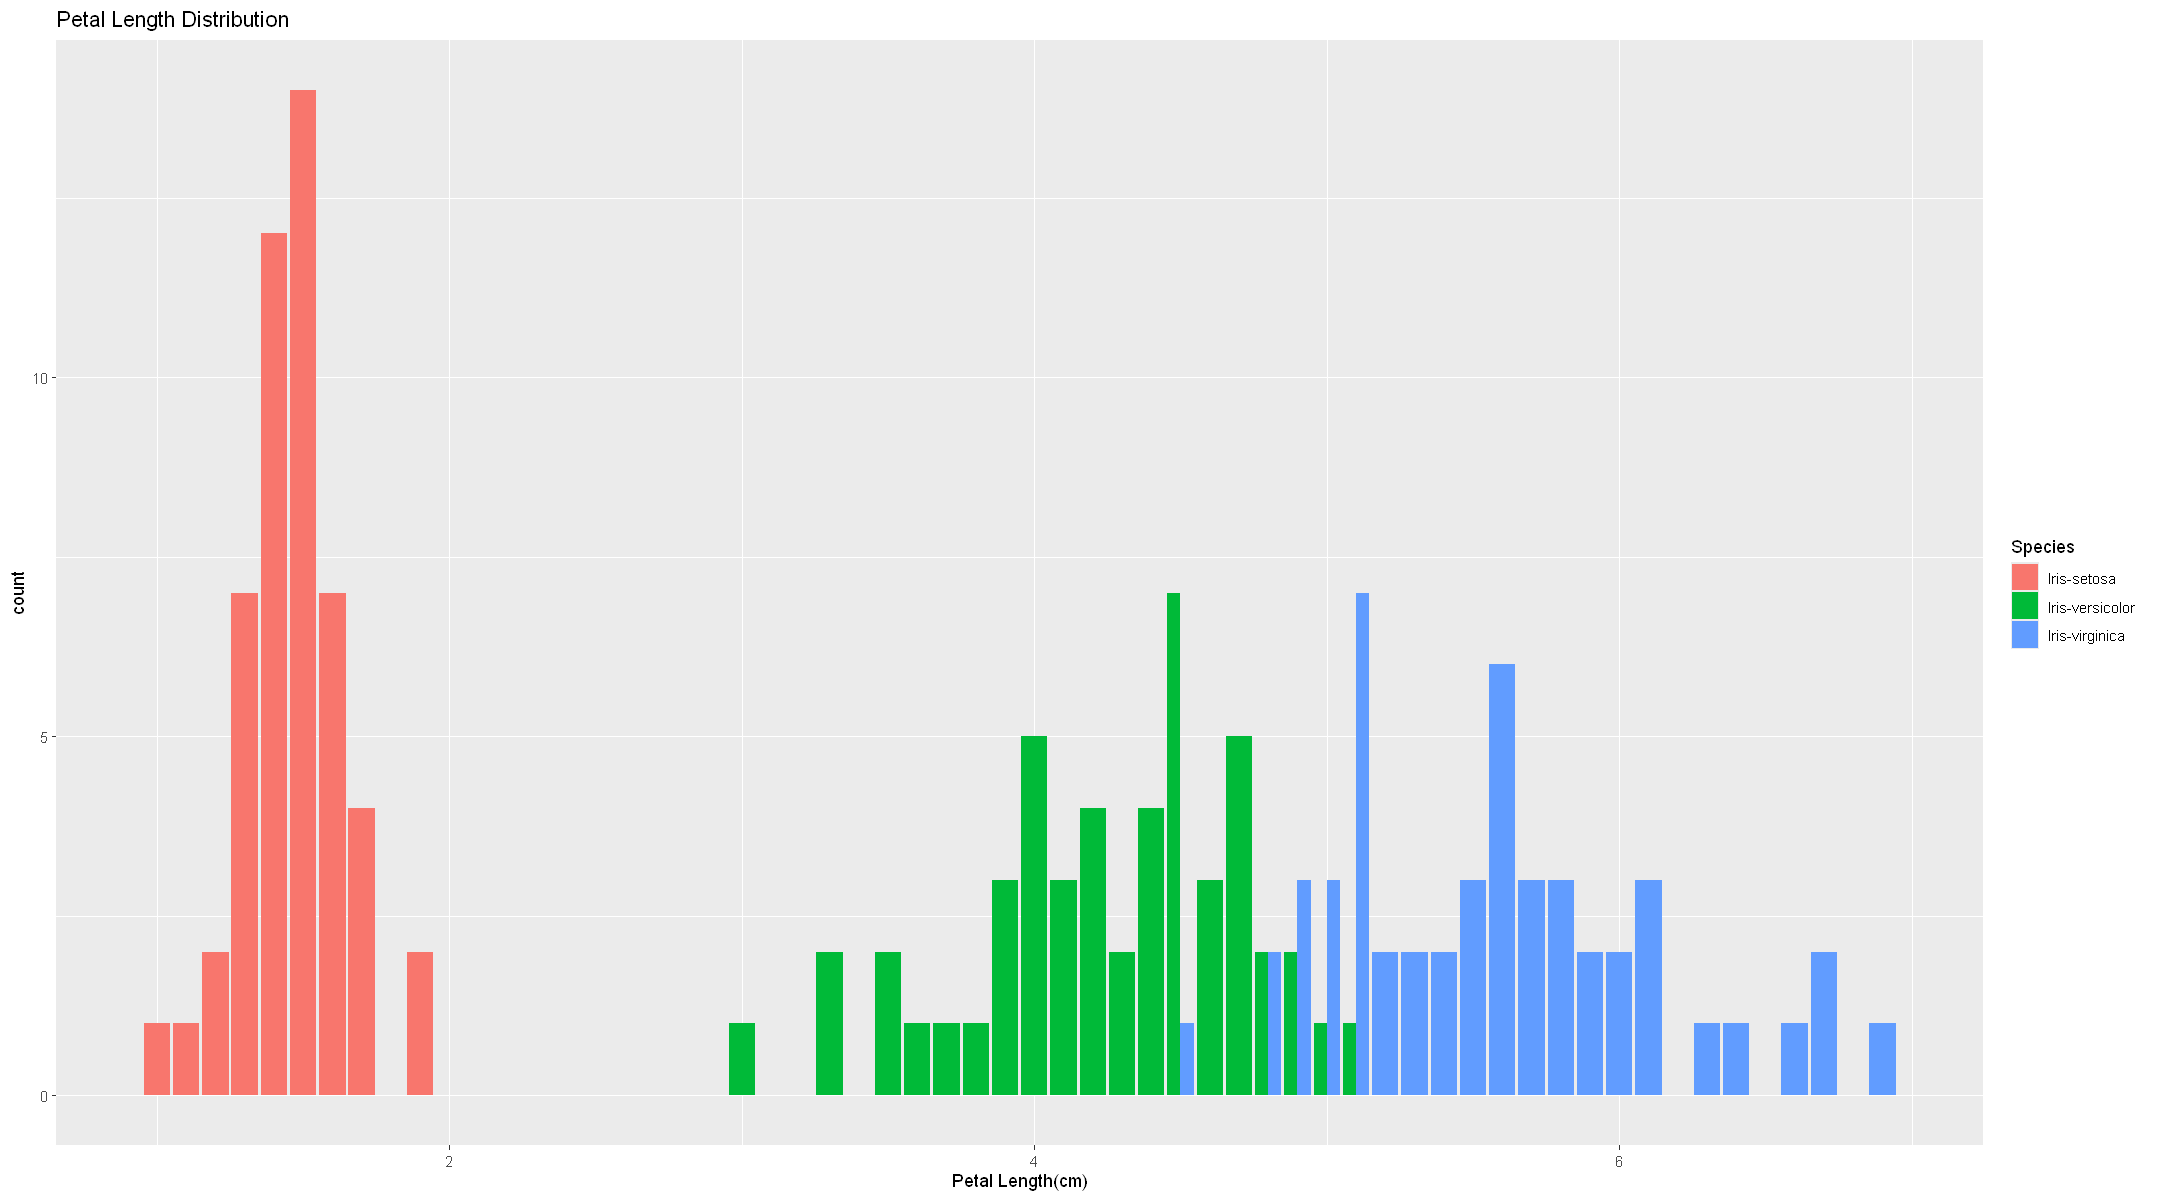

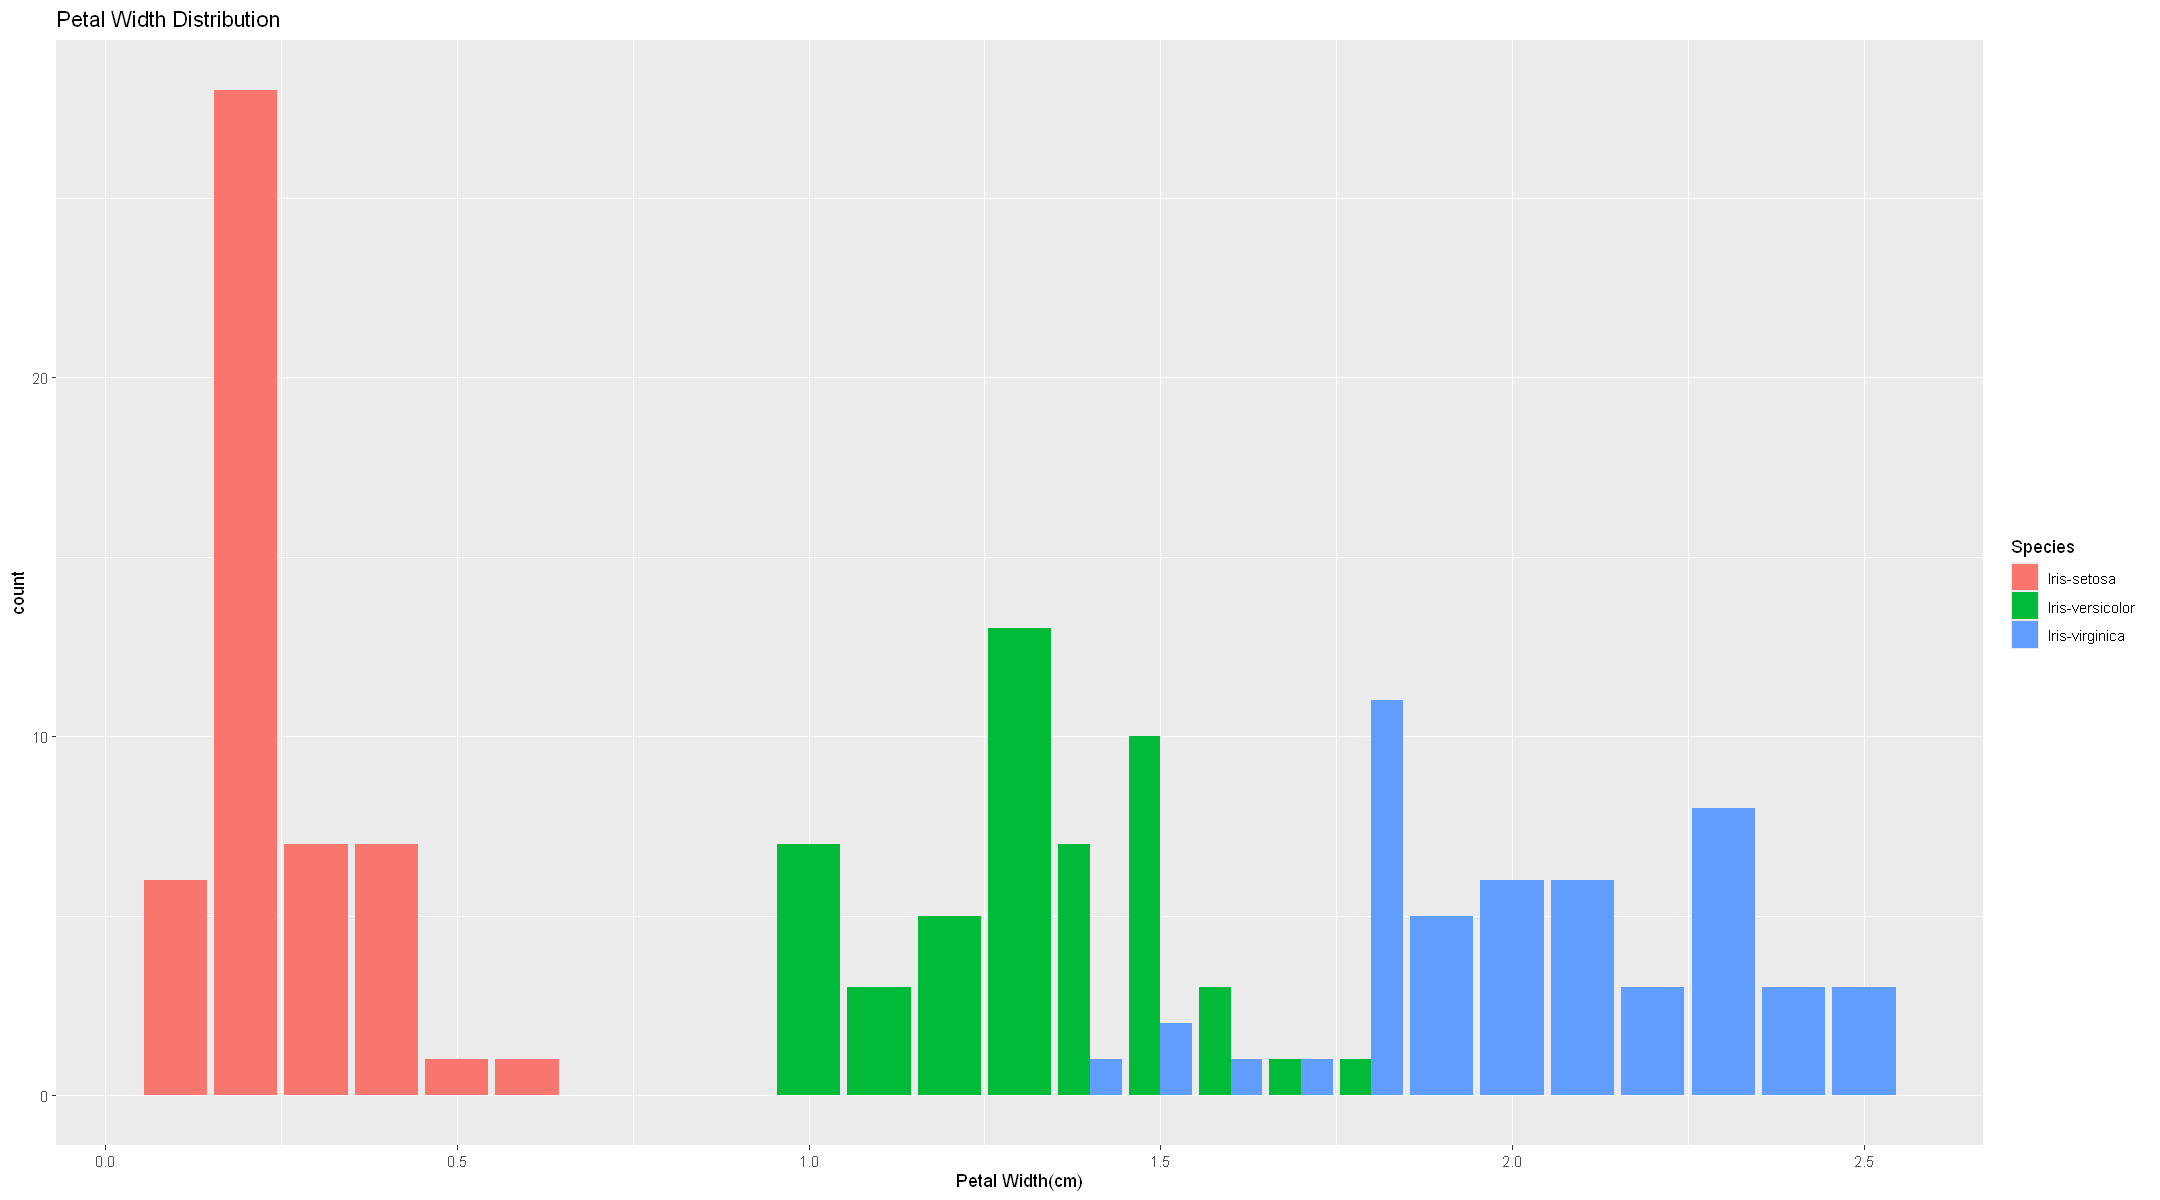

In [16]:
## EXPLORATORY DATA ANALYSIS

# Plotting various metrics for differnt species
ggplot(Iris_Data,aes(SepalLengthCm,fill = Species))+
  geom_bar(position = "dodge") + 
  labs(title = "Sepal Length Distribution",x = "Sepal Length(cm)")
ggplot(Iris_Data,aes(SepalWidthCm,fill = Species))+
  geom_bar(position = "dodge") + 
  labs(title = "Sepal Width Distribution",x = "Sepal Width(cm)")
ggplot(Iris_Data,aes(PetalLengthCm,fill = Species))+
  geom_bar(position = "dodge") + 
  labs(title = "Petal Length Distribution",x = "Petal Length(cm)")
ggplot(Iris_Data,aes(PetalWidthCm,fill = Species))+
  geom_bar(position = "dodge") + 
  labs(title = "Petal Width Distribution",x = "Petal Width(cm)")



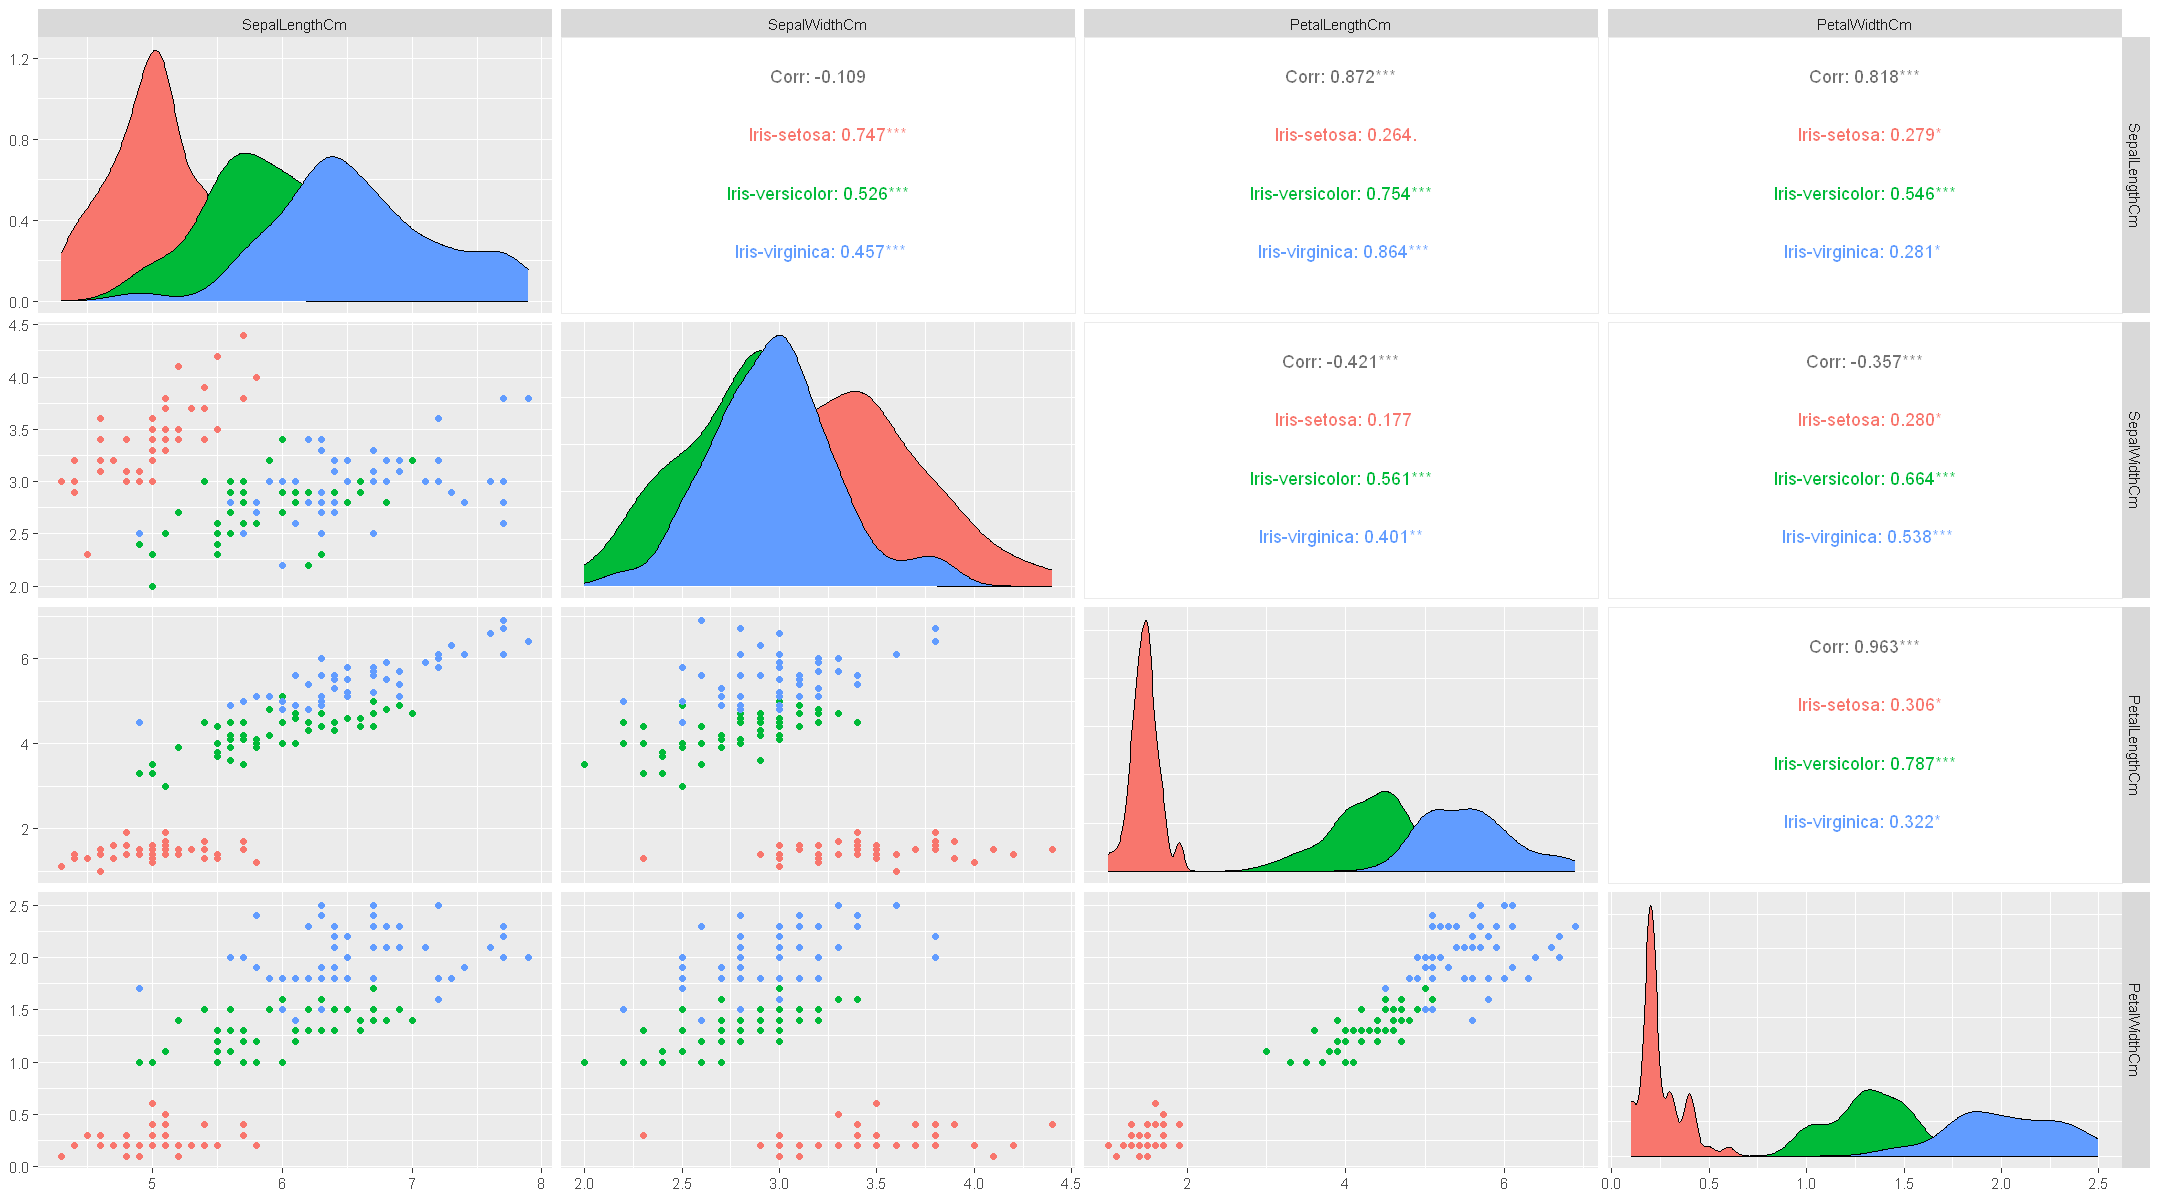

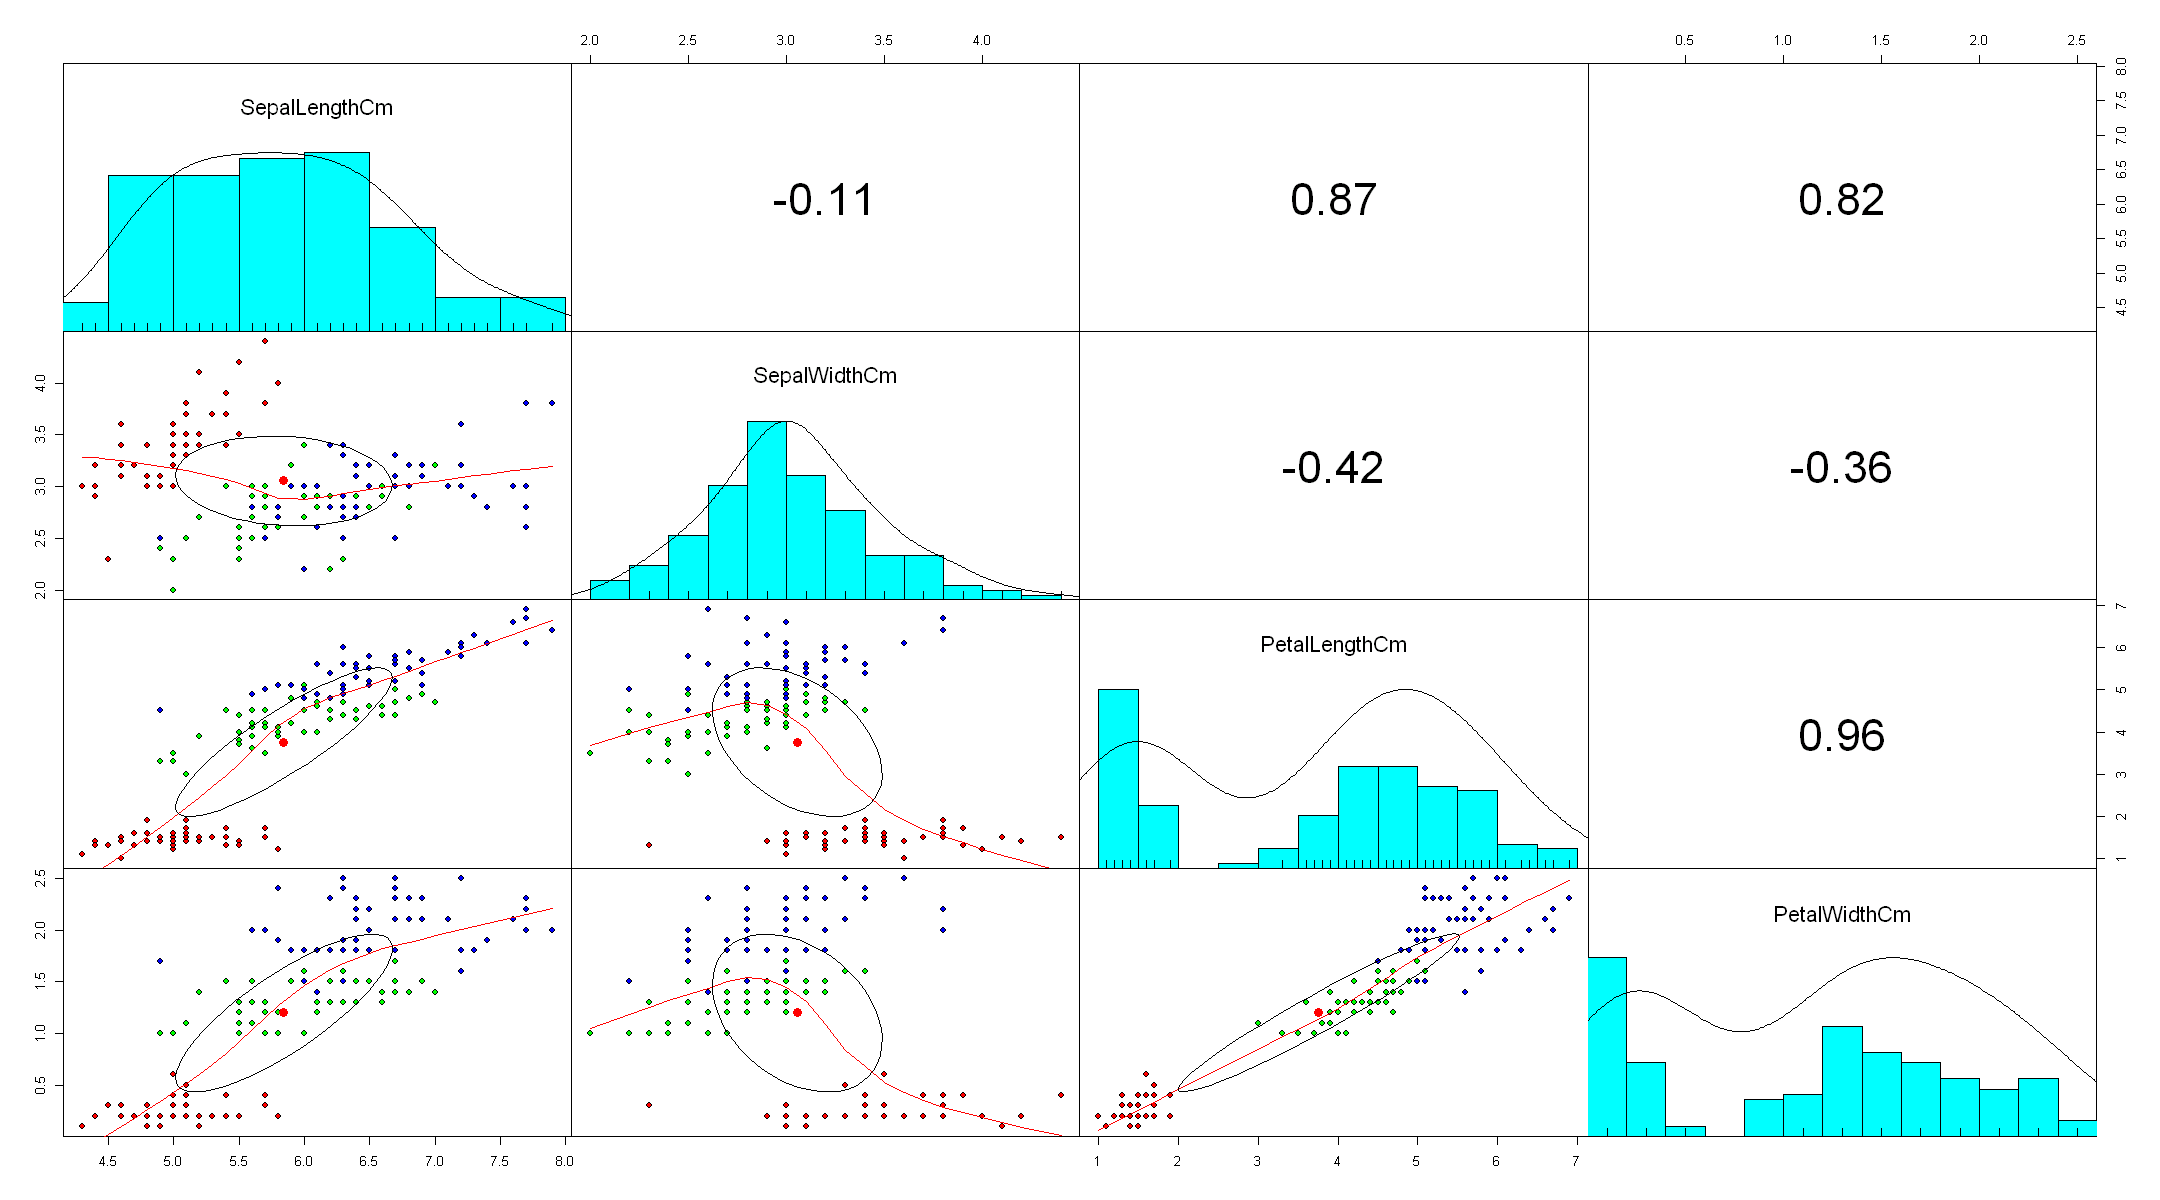

In [17]:
# Comparing and finding Correlation between various metrics.
ggpairs(Iris_Data, columns = 1:4, aes(color = Species))
pairs.panels(Iris_Data[1:4], 
             gap = 0, 
             bg = c("red", "green", "blue")[iris$Species], 
             pch = 21)

In [18]:
## SPLITTING THE DATASET
index <- sample(1:nrow(Iris_Data),as.integer(0.8*nrow(Iris_Data)))
train <- Iris_Data[index,]
test <- Iris_Data[-index,]


In [20]:
## TRAINING THE MODEL
#logistic regression - for binomial : glm & for multinomial :multinom
model1 <- multinom(Species ~ .,data = train)
summary(model1)
P1 <- model1$fitted.values
P1
# random forest model
model2 <- randomForest(as.factor(Species) ~. , data = train)
summary(model2)
# support vector machines
model3 <- svm(as.factor(Species) ~. , data = train)
summary(model3)


# weights:  18 (10 variable)
initial  value 131.833475 
iter  10 value 11.153224
iter  20 value 6.109050
iter  30 value 5.967964
iter  40 value 5.883889
iter  50 value 5.869633
iter  60 value 5.861980
iter  70 value 5.860929
iter  80 value 5.859554
iter  90 value 5.859518
iter 100 value 5.859322
final  value 5.859322 
stopped after 100 iterations


Call:
multinom(formula = Species ~ ., data = train)

Coefficients:
                (Intercept) SepalLengthCm SepalWidthCm PetalLengthCm
Iris-versicolor    17.34586     -5.388451    -7.590888      12.90044
Iris-virginica    -21.23519     -7.533680   -14.501181      21.44650
                PetalWidthCm
Iris-versicolor    -1.061785
Iris-virginica     16.643020

Std. Errors:
                (Intercept) SepalLengthCm SepalWidthCm PetalLengthCm
Iris-versicolor    29.53987      71.47961     124.5914      51.97207
Iris-virginica     30.55473      71.51977     124.6966      52.31355
                PetalWidthCm
Iris-versicolor     38.80674
Iris-virginica      39.30496

Residual Deviance: 11.71864 
AIC: 31.71864 

,Iris-setosa,Iris-versicolor,Iris-virginica
93,5.677666e-08,9.999987e-01,1.290972e-06
78,4.500536e-10,7.019227e-01,2.980773e-01
67,8.730990e-10,9.981866e-01,1.813446e-03
110,3.678227e-20,2.538126e-08,1.000000e+00
27,9.999997e-01,2.531126e-07,6.306356e-30
13,9.999984e-01,1.613768e-06,8.750787e-31
19,1.000000e+00,1.129512e-09,1.581222e-34
66,2.290099e-06,9.999915e-01,6.227171e-06
91,6.472173e-11,9.999250e-01,7.498711e-05
80,1.695174e-05,9.999830e-01,6.464007e-10


                Length Class  Mode     
call               3   -none- call     
type               1   -none- character
predicted        120   factor numeric  
err.rate        2000   -none- numeric  
confusion         12   -none- numeric  
votes            360   matrix numeric  
oob.times        120   -none- numeric  
classes            3   -none- character
importance         4   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            14   -none- list     
y                120   factor numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     


Call:
svm(formula = as.factor(Species) ~ ., data = train)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  47

 ( 20 19 8 )


Number of Classes:  3 

Levels: 
 Iris-setosa Iris-versicolor Iris-virginica




In [21]:
## PREDICTING 
pred1<- predict(model1,test)
pred1

pred2<- predict(model2,test)
pred2

pred3<- predict(model3,test)
pred3


[1] Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa    
 [5] Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa    
 [9] Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa    
[13] Iris-setosa     Iris-setosa     Iris-versicolor Iris-versicolor
[17] Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor
[21] Iris-virginica  Iris-virginica  Iris-virginica  Iris-virginica 
[25] Iris-virginica  Iris-virginica  Iris-virginica  Iris-virginica 
[29] Iris-virginica  Iris-virginica 
Levels: Iris-setosa Iris-versicolor Iris-virginica

2               6               8               9              11 
    Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa 
             14              20              23              31              37 
    Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa 
             39              41              45              47              51 
    Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa Iris-versicolor 
             55              64              69              72              94 
Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor 
            103             108             116             132             133 
 Iris-virginica  Iris-virginica  Iris-virginica  Iris-virginica  Iris-virginica 
            138             140             145             146             149 
 Iris-virginica  Iris-virginica  Iris-virginica  Iris-virginica  Iris-virginica 
Levels: Iris-setosa Iris-versicolor Iris-virginica

2               6               8               9              11 
    Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa 
             14              20              23              31              37 
    Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa 
             39              41              45              47              51 
    Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa Iris-versicolor 
             55              64              69              72              94 
Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor 
            103             108             116             132             133 
 Iris-virginica  Iris-virginica  Iris-virginica  Iris-virginica  Iris-virginica 
            138             140             145             146             149 
 Iris-virginica  Iris-virginica  Iris-virginica  Iris-virginica  Iris-virginica 
Levels: Iris-setosa Iris-versicolor Iris-virginica

In [22]:
## MODEL EVALUATION 
correct1 <- sum(ifelse(pred1 == test$Species,1,0))
accuracy1 <- correct1/length(test$Species)
accuracy1*100
CM1 <- confusionMatrix(pred1, as.factor(test$Species))
print(CM1)
pR2(model1)

correct2 <- sum(ifelse(pred2 == test$Species,1,0))
accuracy2 <- correct2/length(test$Species)
accuracy2*100
CM2 <- confusionMatrix(pred2,as.factor(test$Species))
print(CM2)

correct3 <- sum(ifelse(pred3 == test$Species,1,0))
accuracy3 <- correct3/length(test$Species)
accuracy3*100
CM3 <- confusionMatrix(pred3,as.factor(test$Species))
print(CM3)


[1] 100

Confusion Matrix and Statistics

                 Reference
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              14               0              0
  Iris-versicolor           0               6              0
  Iris-virginica            0               0             10

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8843, 1)
    No Information Rate : 0.4667     
    P-Value [Acc > NIR] : 1.175e-10  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: Iris-setosa Class: Iris-versicolor
Sensitivity                      1.0000                    1.0
Specificity                      1.0000                    1.0
Pos Pred Value                   1.0000                    1.0
Neg Pred Value                   1.0000                    

llh      llhNull           G2     McFadden         r2ML         r2CU 
  -5.8593220 -131.4328053  251.1469666    0.9554196    0.8766700    0.9870804

[1] 100

Confusion Matrix and Statistics

                 Reference
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              14               0              0
  Iris-versicolor           0               6              0
  Iris-virginica            0               0             10

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8843, 1)
    No Information Rate : 0.4667     
    P-Value [Acc > NIR] : 1.175e-10  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: Iris-setosa Class: Iris-versicolor
Sensitivity                      1.0000                    1.0
Specificity                      1.0000                    1.0
Pos Pred Value                   1.0000                    1.0
Neg Pred Value                   1.0000                    

[1] 100

Confusion Matrix and Statistics

                 Reference
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              14               0              0
  Iris-versicolor           0               6              0
  Iris-virginica            0               0             10

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8843, 1)
    No Information Rate : 0.4667     
    P-Value [Acc > NIR] : 1.175e-10  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: Iris-setosa Class: Iris-versicolor
Sensitivity                      1.0000                    1.0
Specificity                      1.0000                    1.0
Pos Pred Value                   1.0000                    1.0
Neg Pred Value                   1.0000                    

In [23]:
# TESTING THE MODEL 
X_new = X_new <- data.frame(SepalLengthCm = c(5, 3.9, 6.3),
                            SepalWidthCm = c(4, 2.8, 8.5),
                            PetalLengthCm = c(1, 5.5, 9.6),
                            PetalWidthCm = c(0.2, 1.1, 4.9))

colnames(X_new) <- c("SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm")
predicted_sizes1 = predict(model1,X_new)
print(predicted_sizes1)

predicted_sizes2 <- predict(model2,X_new)
print(predicted_sizes2)

predicted_sizes3 <- predict(model3,X_new)
print(predicted_sizes3)


[1] Iris-setosa    Iris-virginica Iris-virginica
Levels: Iris-setosa Iris-versicolor Iris-virginica
             1              2              3 
   Iris-setosa Iris-virginica Iris-virginica 
Levels: Iris-setosa Iris-versicolor Iris-virginica
              1               2               3 
    Iris-setosa Iris-versicolor Iris-versicolor 
Levels: Iris-setosa Iris-versicolor Iris-virginica
